# Site-Specific Ligand Binding

In Notebook 1 we introduced the binary notation for site-specific states. Now we make the model quantitative by assigning equilibrium constants utilizing a non-redundant, hierarchical parameterization (see Gutheil & McKenna 1992 - doi:10.1016/0301-4622(92)87009-8). A non-redundant parameterization is critical to prevent complex relationships between the equilibrium constants due to the presence of thermodynamic cycles. A hierarchical parameterization is important for tailoring the model specific scenarios as we will see in Notebook 3.

**Initialise each code block (`In [ ]:`) by clicking on the cell and pressing `SHIFT`+`ENTER`.**

## 2. Parameterization

We use the example of a three-site system in which all three sites bind the same ligand, which provides sufficient complexity but is computed fast enough to allow smooth user interaction. Recall from Notebook 1 that the states for the three-site system are represented with the binary notation:

In [1]:
states = ['000','100','010','001','110','101','011','111']

Here we require six non-redundant equilibrium constants, as this is one less than the total number of states (one state is a reference). We assign the ligand-free macromolecule as the reference state (`000`). 

Note that the six binary strings describing the liganded states can be used to denote six non-redundant equilibrium constants. The hierarchical parameterization results in two types of equilibrium constants:
* $K_{100}$, $K_{010}$, $K_{001}$ are intrinsic association constants for each site denoted in the subscript.
* $\alpha_{110}$, $\alpha_{101}$, $\alpha_{011}$, $\alpha_{111}$ are linkage constants, quantifying the coupling between sets of sites denoted in the subscript. 

These equilibrium constants are assigned on the three-site scheme below. In Notebook 3 an equation is defined for applying the hierarchical parameterization to any number of sites.

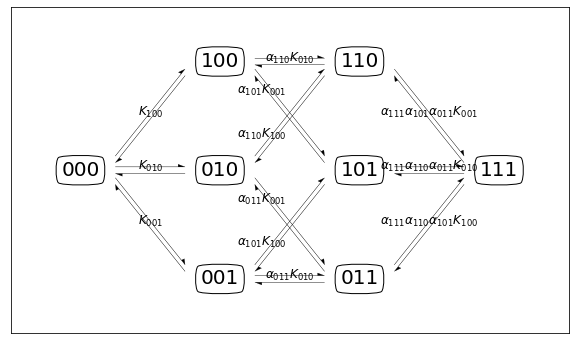

In [2]:
import re
import numpy as np
from matplotlib import pylab as plt
import itertools

%matplotlib inline

# settings for the equilibrium arrows
arrow_kwargs = {'head_width':0.05,'head_length':0.05,'fc':'k','linewidth':0.2,
                'length_includes_head':True,'shape':'right'}

n_sites = 3

# group strings by the number of 1's
grouped_states = [[] for i in range(0,n_sites+1)] 

for state in states:                        
    n_ligands = state.count('1')                
    grouped_states[n_ligands].append(state)

# plot the grouped states
fig, ax = plt.subplots(1, 1, figsize=(10, 6))   
max_sub = 0
group_tmp1, group_tmp2 = ([],[])
offset, offset2 = (0.25,0.03)   # emperical offsets

def step_down(state):
    '''
    Decompose a binary string into a list of strings with one less '1'
    '''
    tmp = []
    for i in range(len(state)):
        if(state[i]=='1'):
            tmp.append(state[:i]+'0'+state[i+1:])
    return tmp 

for x,group in enumerate(grouped_states):
    n_sub = len(group)
    if(n_sub>max_sub): max_sub = len(group)
    for j,state in enumerate(group):
        y = n_sub/2-j-0.5
        
        # plot the state
        ax.text(x,y,state,fontsize=60./n_sites,
                horizontalalignment='center',verticalalignment='center',
                bbox=dict(facecolor='none', edgecolor='black', 
                          boxstyle='round4', fc='white'))
                
        # plot equilibrium arrows
        group_tmp1.append([state,x,y])
        down_states = step_down(state)
        
        for group_tmp in group_tmp2:
            if(group_tmp[0] in down_states):
                # empirical offset to 'scale' arrows
                if(group_tmp[2]<y): offset3 = 0.1
                elif(group_tmp[2]==y): offset3 = 0.
                else: offset3 = -0.1
                
                # forward arrow
                ax.arrow(group_tmp[1]+offset,group_tmp[2]+offset2+offset3,
                         x-group_tmp[1]-offset*2,y-group_tmp[2]-2*offset3,
                         **arrow_kwargs)
                # reverse arrow
                ax.arrow(x-offset,y-offset2-offset3,
                         group_tmp[1]-x+offset*2,group_tmp[2]-y+2*offset3,
                         **arrow_kwargs)
                # equilibrium constant
                offset4 = 0.
                lig_pos = [i for i in range(0,n_sites) if state[i]!=group_tmp[0][i]][0]
                K = '0'*n_sites
                K = K[:lig_pos]+'1'+K[lig_pos+1:]
                eqK = 'K_{{{}}}'.format(K)
                if(state.count('1')==2):
                    eqK = '\\alpha_{{{}}}'.format(state)+eqK
                    offset4 = -2*offset3
                elif(state.count('1')==3):
                    tmp = down_states.copy()
                    tmp.remove(group_tmp[0])
                    for a in tmp:
                        eqK = '\\alpha_{{{}}}'.format(a)+eqK
                    eqK = '\\alpha_{{{}}}'.format('111')+eqK
                ax.text(x-(x-group_tmp[1])/2-abs(offset4),y-(y-group_tmp[2])/2+offset4,
                        '$'+eqK+'$',fontsize=12.,horizontalalignment='center')
    
    group_tmp2 = group_tmp1   

ax.set_xlim(-0.5,n_sites+0.5)
ax.set_ylim(-max_sub/2.,max_sub/2.)
ax.set_xticks([])
ax.set_yticks([]);

From this scheme we see that the intrinsic affinities of each site are modulated by the linkage constants. We can also use the equilibrium equations from this scheme to determine the population of each state:

\begin{align}
[M_{100}]/[M_T] &= K_{100}[L]/Z \\
[M_{010}]/[M_T] &= K_{010}[L]/Z \\
[M_{001}]/[M_T] &= K_{001}[L]/Z \\
[M_{110}]/[M_T] &= \alpha_{110}K_{100}K_{010}[L]^2/Z \\
[M_{101}]/[M_T] &= \alpha_{101}K_{100}K_{001}[L]^2/Z \\
[M_{011}]/[M_T] &= \alpha_{011}K_{010}K_{001}[L]^2/Z \\
[M_{111}]/[M_T] &= \alpha_{111}\alpha_{110}\alpha_{101}\alpha_{011}K_{100}K_{010}K_{001}[L]^3/Z
\end{align}

where $[M_\mathbf{B}]$ is the concentration of macromolecule with ligand binding sites occupied according to the binary vector $\mathbf{B}$, $[L_i]$ is the concentration of free ligand for site $i$, and $\alpha_\mathbf{B}$ and $K_\mathbf{B}$ are the hierarchical equilibrium constants. $Z = 1+K_{100}[L]+K_{010}[L]+K_{001}[L]+\alpha_{110}K_{100}K_{010}[L]^2+\alpha_{101}K_{100}K_{001}[L]^2+\alpha_{011}K_{010}K_{001}[L]^2+\alpha_{111}\alpha_{110}\alpha_{101}\alpha_{011}K_{100}K_{010}K_{001}[L]^3$ is the binding polynomial, which will be expanded on in the next notebook.

### We now examine the effect of varying these equilibrium constants on the population of each state. Toggle the sliders below the code to vary the magnitude of each parameter.

In [3]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
from ipywidgets import Layout,Label
import numpy as np
from matplotlib import pylab as plt
from matplotlib import rc

%matplotlib inline

out0 = widgets.Output(layout=Layout(height='250px', width = '700px'))
button0 = widgets.Button(description='Re-initialise',layout=Layout(width='700px'))
vbox0 = widgets.VBox([button0,out0])
display(vbox0)

color = ['#a1dab4','#41b6c4','#2c7fb8','#253494']
style = ['-','-','--',':','-','--',':','-']

def reinitialise(b=None):
    # initialise dictionary for the parameter widgets
    params = dict((k,1.) for k in states[1:])
    
    # log scale values for the free ligand concentration
    L = np.logspace(-2,2)
    
    # make slider widgets for each parameter
    for B in states[1:]:
        params[B] = widgets.FloatLogSlider(value=1.,min=-1,max=1,step=0.1,
                                        layout=Layout(width='300px'),
                                        continuous_update=False)
        if(B.count('1')==1):
            params[B].description = r'\(K_{{{}}}\)'.format(B)
        else:
            params[B].description = r'\(\alpha_{{{}}}\)'.format(B)
    
    # widgets and formatting
    out2 = widgets.Output(layout=Layout(height='300px', width = '400px'))
    vbox2a = widgets.VBox(children=[k for k in params.values()])
    vbox2b = widgets.VBox(children=[out2])
    hbox2 = widgets.HBox([vbox2a,vbox2b])
    with out0:
        clear_output(wait=True)
        display(hbox2)        
        
    def plot_states(b=None):
        '''
        Compute the concentration of each state and plot the fractional of molecules
        in this state as a function of the free ligand concentration.
        '''
        # initialise dictionary for the concentration of each state
        Z = dict((k,1.) for k in states)
        
        rc('font', **{'size':22})
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
        
        # substitute the interactive values for parameters
        Z['000'] = 1.
        Z['100'] = params['100'].value*L
        Z['010'] = params['010'].value*L
        Z['001'] = params['001'].value*L
        Z['110'] = params['110'].value*Z['100']*Z['010']
        Z['101'] = params['101'].value*Z['100']*Z['001']
        Z['011'] = params['011'].value*Z['010']*Z['001']
        Z['111'] = params['111'].value*(params['110'].value*params['101'].value*
                                        params['011'].value)*Z['100']*Z['010']*Z['001']                         
        Z_sum = sum(Z.values())
        
        for i,B in enumerate(states):
            ax.semilogx(L,Z[B]/Z_sum, label=B,color=color[B.count('1')],
                        linewidth=5,linestyle=style[i],alpha=0.6)
        ax.set_xlabel('[Free Ligand]')
        ax.set_ylabel('Fraction in state')
        ax.legend(bbox_to_anchor=(1.05, 1))
        with out2:
            plt.close('all')
            clear_output(wait=True)
            display(ax.figure)      
    
    plot_states()
    
    for B in params:
        params[B].observe(plot_states, 'value')

button0.on_click(reinitialise)
reinitialise()

### We can also consider the effect of the linkage constants on the binding at site 1. Use the check boxes to toggle the presence of the other ligands.

For simplicity we assume that the interaction between the functional and switching sites (1 and 3) and between the regulatory and switching sites (2 and 3) are negligible.

In [4]:
%matplotlib inline

# initialise dictionary for the parameter widgets and concentrations
params2 = dict((k,1.) for k in states[4:])
Z2 = dict((k,1.) for k in states)

# log scale values for the free ligand concentration
L1 = np.logspace(-2,2)

# make slider widgets for the linkage constants of interest
params2['110'] = widgets.FloatLogSlider(value=5.,min=-2,max=2,step=0.2,
                                        layout=Layout(width='400px'),
                                        continuous_update=False)
params2['110'].description = r'\(\alpha_{110}\)'

params2['111'] = widgets.FloatLogSlider(value=1/25.,min=-2,max=2,step=0.2,
                                        layout=Layout(width='400px'),
                                        continuous_update=False)
params2['111'].description = r'\(\alpha_{111}\)'


# widgets and formatting
out2 = widgets.Output(layout=Layout(height='300px', width = '700px'))
vbox2a = widgets.VBox(children=[params2['110'],params2['111']])
vbox2b = widgets.VBox(children=[out2])
vbox2 = widgets.VBox([vbox2a,vbox2b])
display(vbox2)        

rc('font', **{'size':22})
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_xlabel('$K_{100}[L_{1}]$')
ax.set_ylabel('Fraction')
ax.set_title('Occupancy of Site 1')
plt.draw()

# fix certain parameters
Z2['000'], Z2['100'], Z2['010'] = 1., L1, 1e10
params2['101'], params2['011'] = 1., 1.

# isotherm in absence of ligand 2 or 3
line1, = ax.semilogx(L1,L1/(1+L1),'k',label='$[L_2]=0,[L_3]=0$')
ax.draw_artist(line1)

line2 = [[],[]]
linestyles = ['--',':']
labels = ['$[L_2]=10^{10},[L_3]=0$','$[L_2]=10^{10},[L_3]=10^{10}$']

def plot_states(b=None):
    '''
    Compute the concentration of each state and plot the fractional of molecules
    in this state as a function of the free ligand concentration.
    '''   
    site1 = [0.,0.]
    for i,Z2['001'] in enumerate([0,1e10]):
        Z2['110'] = params2['110'].value*Z2['100']*Z2['010']
        Z2['101'] = params2['101']*Z2['100']*Z2['001']
        Z2['011'] = params2['011']*Z2['010']*Z2['001']
        Z2['111'] = params2['111'].value*(params2['110'].value*params2['101']*
                                          params2['011'])*Z2['100']*Z2['010']*Z2['001']     
        Z2_sum = sum(Z2.values())
    
        # compute amount of site 1 occupied
        for B in states[1:]:
            if(B[0]=='1'):
                site1[i] = site1[i] + Z2[B]
        line2[i], = ax.semilogx(L1,site1[i]/Z2_sum,color='k',linestyle=linestyles[i],
                                label=labels[i],alpha=0.6,linewidth=3)
        ax.draw_artist(line2[i])
    ax.legend(bbox_to_anchor=(1.05, 1))
    fig.update

    with out2:
        clear_output(wait=True)
        display(fig)
        line2[0].remove()
        line2[1].remove()

plot_states()

params2['110'].observe(plot_states, 'value')
params2['111'].observe(plot_states, 'value')
plt.close()